About this file
pol_number policy number for the insurance policy

pol_eff_dt auto insurance policy effective date

gender gender of driver: F, M

agecat driver's age category: 1 (youngest), 2, 3, 4, 5, 6

date_of_birth driver's date of birth

credit_score driver’s credit score(integer): 1-100, 1=poor, 100=excellent

area driver's area of residence: A, B, C, D, E, F

traffic_index traffic index of driver’s area of residence(integer): 100=country average, >100 means worse traffic conditions than average

veh_age age of vehicle(categorical): 1 (youngest), 2, 3, 4

veh_body vehicle body, coded as:
BUS
CONVT = convertible
COUPE
HBACK = hatchback
HDTOP = hardtop
MCARA = motorized caravan
MIBUS = minibus
PANVN = panel van
RDSTR = roadster
STNWG = station wagon
TRUCK
UTE = utility

veh_value vehicle value, in $10,000s

months_insured number of months vehicle insurance is bought(integer)

claim_office office location of claim handling agent: A, B, C, D

numclaims number of claims(integer): 0 if no claim

claimcst0 claim amount: 0 if no claim

annual_premium total charged premium i.e. the cost of insurance

** Target create a customer segmentation campaign that uses the vehical_policies_2020.csv dataset to label customers based on their risk profiles (e.g. riskier customers, less risky customers, normal drivers, etc.).

## İmport Libary And  Dataset

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random


#İgnore Error
pd.set_option('display.max_colwidth', None)
import warnings
warnings.simplefilter(action="ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = [4, 4]

In [92]:
df=pd.read_csv('Vehicle_policies_2020.csv')

In [93]:
df

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
0,43124327,12/30/2020,F,4.0,7/12/1968,381.0,D,133.6,2,HBACK,1.331,NaN,0,0.0,716.53
1,21919609,12/30/2020,F,2.0,11/5/1982,549.0,D,163.6,1,UTE,3.740,NaN,0,0.0,716.53
2,72577057,12/30/2020,M,2.0,11/26/1983,649.0,B,117.5,4,COUPE,0.880,NaN,0,0.0,716.53
3,92175225,12/30/2020,M,4.0,11/2/1960,743.0,B,100.7,3,SEDAN,1.045,NaN,0,0.0,716.53
4,66223239,12/30/2020,F,4.0,1/4/1968,817.0,C,115.5,4,HBACK,0.473,NaN,0,0.0,716.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60387,73248694,1/2/2020,F,5.0,5/10/1956,809.0,C,145.5,4,HBACK,0.891,NaN,0,0.0,716.53
60388,71411764,1/2/2020,M,4.0,3/22/1961,681.0,D,86.3,1,HBACK,1.881,NaN,0,0.0,716.53
60389,89353155,1/2/2020,M,4.0,9/29/1965,773.0,F,110.0,1,STNWG,5.170,NaN,0,0.0,716.53
60390,40916605,1/2/2020,M,3.0,8/1/1978,714.0,B,NaN,1,HBACK,1.903,NaN,0,0.0,716.53


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60392 entries, 0 to 60391
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pol_number      60392 non-null  int64  
 1   pol_eff_dt      60392 non-null  object 
 2   gender          60392 non-null  object 
 3   agecat          55561 non-null  float64
 4   date_of_birth   60392 non-null  object 
 5   credit_score    57591 non-null  float64
 6   area            60392 non-null  object 
 7   traffic_index   56889 non-null  float64
 8   veh_age         60392 non-null  int64  
 9   veh_body        60392 non-null  object 
 10  veh_value       60392 non-null  float64
 11  claim_office    10030 non-null  object 
 12  numclaims       60392 non-null  int64  
 13  claimcst0       60392 non-null  float64
 14  annual_premium  60392 non-null  float64
dtypes: float64(6), int64(3), object(6)
memory usage: 6.9+ MB


## Expolarty Dataset

In [102]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(12)

,Total,%
agecat,4831,8.0
traffic_index,3503,5.8
credit_score,2801,4.6
gender,0,0.0
date_of_birth,0,0.0
area,0,0.0
veh_age,0,0.0
veh_body,0,0.0
veh_value,0,0.0
numclaims,0,0.0


In [95]:
df.pol_number.value_counts()

43124327    1
86071234    1
10233769    1
86356488    1
57138602    1
           ..
39371444    1
65998620    1
73650456    1
20832147    1
33623054    1
Name: pol_number, Length: 60392, dtype: int64

In [96]:
df.pol_eff_dt.value_counts

<bound method IndexOpsMixin.value_counts of 0        12/30/2020
1        12/30/2020
2        12/30/2020
3        12/30/2020
4        12/30/2020
            ...    
60387      1/2/2020
60388      1/2/2020
60389      1/2/2020
60390      1/2/2020
60391      1/2/2020
Name: pol_eff_dt, Length: 60392, dtype: object>

In [97]:
df.drop(columns='pol_number',inplace=True,axis=1)

In [98]:
df.drop(columns='pol_eff_dt',inplace=True,axis=1)

In [99]:
df.drop(columns='claim_office',inplace=True,axis=1)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60392 entries, 0 to 60391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          60392 non-null  object 
 1   agecat          55561 non-null  float64
 2   date_of_birth   60392 non-null  object 
 3   credit_score    57591 non-null  float64
 4   area            60392 non-null  object 
 5   traffic_index   56889 non-null  float64
 6   veh_age         60392 non-null  int64  
 7   veh_body        60392 non-null  object 
 8   veh_value       60392 non-null  float64
 9   numclaims       60392 non-null  int64  
 10  claimcst0       60392 non-null  float64
 11  annual_premium  60392 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 5.5+ MB


In [101]:
df.describe()

,agecat,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium
count,55561.000000,57591.000000,56889.000000,60392.000000,60392.000000,60392.000000,60392.000000,6.039200e+04
mean,3.488310,662.193190,103.892536,2.673748,1.956051,0.214250,644.875932,7.165300e+02
std,1.425133,136.450182,33.688679,1.068058,1.330279,0.552291,3354.631809,6.165288e-10
min,1.000000,301.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.165300e+02
25%,2.000000,602.000000,80.300000,2.000000,1.111000,0.000000,0.000000,7.165300e+02
50%,3.000000,682.000000,108.300000,3.000000,1.650000,0.000000,0.000000,7.165300e+02
75%,5.000000,772.000000,132.000000,4.000000,2.365000,0.000000,0.000000,7.165300e+02
max,6.000000,850.000000,207.000000,4.000000,38.016000,5.000000,69478.897830,7.165300e+02


In [103]:
df.agecat.value_counts()

4.0    13279
3.0    12930
2.0    10497
5.0     8791
6.0     5379
1.0     4685
Name: agecat, dtype: int64

## Pre Procressing

In [104]:
df.agecat=df.agecat.fillna(df.agecat.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60392 entries, 0 to 60391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          60392 non-null  object 
 1   agecat          60392 non-null  float64
 2   date_of_birth   60392 non-null  object 
 3   credit_score    57591 non-null  float64
 4   area            60392 non-null  object 
 5   traffic_index   56889 non-null  float64
 6   veh_age         60392 non-null  int64  
 7   veh_body        60392 non-null  object 
 8   veh_value       60392 non-null  float64
 9   numclaims       60392 non-null  int64  
 10  claimcst0       60392 non-null  float64
 11  annual_premium  60392 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 5.5+ MB


In [105]:
df.credit_score.describe()

count    57591.000000
mean       662.193190
std        136.450182
min        301.000000
25%        602.000000
50%        682.000000
75%        772.000000
max        850.000000
Name: credit_score, dtype: float64

In [106]:
df.credit_score=df.credit_score.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60392 entries, 0 to 60391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          60392 non-null  object 
 1   agecat          60392 non-null  float64
 2   date_of_birth   60392 non-null  object 
 3   credit_score    60392 non-null  float64
 4   area            60392 non-null  object 
 5   traffic_index   56889 non-null  float64
 6   veh_age         60392 non-null  int64  
 7   veh_body        60392 non-null  object 
 8   veh_value       60392 non-null  float64
 9   numclaims       60392 non-null  int64  
 10  claimcst0       60392 non-null  float64
 11  annual_premium  60392 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 5.5+ MB


In [107]:
df.traffic_index.describe().T

count    56889.000000
mean       103.892536
std         33.688679
min          0.000000
25%         80.300000
50%        108.300000
75%        132.000000
max        207.000000
Name: traffic_index, dtype: float64

In [108]:
df.traffic_index=df.traffic_index.fillna(df.traffic_index.mean())

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60392 entries, 0 to 60391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          60392 non-null  object 
 1   agecat          60392 non-null  float64
 2   date_of_birth   60392 non-null  object 
 3   credit_score    60392 non-null  float64
 4   area            60392 non-null  object 
 5   traffic_index   60392 non-null  float64
 6   veh_age         60392 non-null  int64  
 7   veh_body        60392 non-null  object 
 8   veh_value       60392 non-null  float64
 9   numclaims       60392 non-null  int64  
 10  claimcst0       60392 non-null  float64
 11  annual_premium  60392 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 5.5+ MB


In [110]:
df.annual_premium.unique()

array([716.53])

In [111]:
df['gender']=pd.get_dummies(df['gender'], drop_first=True)

In [112]:
df

,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0,annual_premium
0,0,4.0,7/12/1968,381.0,D,133.600000,2,HBACK,1.331,0,0.0,716.53
1,0,2.0,11/5/1982,549.0,D,163.600000,1,UTE,3.740,0,0.0,716.53
2,1,2.0,11/26/1983,649.0,B,117.500000,4,COUPE,0.880,0,0.0,716.53
3,1,4.0,11/2/1960,743.0,B,100.700000,3,SEDAN,1.045,0,0.0,716.53
4,0,4.0,1/4/1968,817.0,C,115.500000,4,HBACK,0.473,0,0.0,716.53
...,...,...,...,...,...,...,...,...,...,...,...,...
60387,0,5.0,5/10/1956,809.0,C,145.500000,4,HBACK,0.891,0,0.0,716.53
60388,1,4.0,3/22/1961,681.0,D,86.300000,1,HBACK,1.881,0,0.0,716.53
60389,1,4.0,9/29/1965,773.0,F,110.000000,1,STNWG,5.170,0,0.0,716.53
60390,1,3.0,8/1/1978,714.0,B,103.892536,1,HBACK,1.903,0,0.0,716.53


In [113]:
df['birthdate']= pd.to_datetime(df['date_of_birth']).dt.year

In [114]:
df.drop(columns='date_of_birth',inplace=True,axis=1)
df

,gender,agecat,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0,annual_premium,birthdate
0,0,4.0,381.0,D,133.600000,2,HBACK,1.331,0,0.0,716.53,1968
1,0,2.0,549.0,D,163.600000,1,UTE,3.740,0,0.0,716.53,1982
2,1,2.0,649.0,B,117.500000,4,COUPE,0.880,0,0.0,716.53,1983
3,1,4.0,743.0,B,100.700000,3,SEDAN,1.045,0,0.0,716.53,1960
4,0,4.0,817.0,C,115.500000,4,HBACK,0.473,0,0.0,716.53,1968
...,...,...,...,...,...,...,...,...,...,...,...,...
60387,0,5.0,809.0,C,145.500000,4,HBACK,0.891,0,0.0,716.53,1956
60388,1,4.0,681.0,D,86.300000,1,HBACK,1.881,0,0.0,716.53,1961
60389,1,4.0,773.0,F,110.000000,1,STNWG,5.170,0,0.0,716.53,1965
60390,1,3.0,714.0,B,103.892536,1,HBACK,1.903,0,0.0,716.53,1978


In [115]:
df.area.value_counts()

C    18236
A    14476
B    11908
D     7324
E     5276
F     3172
Name: area, dtype: int64

In [116]:
df.veh_body.value_counts()

SEDAN    19798
HBACK    16793
STNWG    14487
UTE       4101
TRUCK     1561
HDTOP     1403
COUPE      698
PANVN      663
MIBUS      639
MCARA      111
CONVT       74
BUS         42
RDSTR       22
Name: veh_body, dtype: int64

In [117]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df.area=label_encoder.fit_transform(df['area'])
df.veh_body=label_encoder.fit_transform(df['veh_body'])

In [118]:
df

,gender,agecat,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0,annual_premium,birthdate
0,0,4.0,381.0,3,133.600000,2,3,1.331,0,0.0,716.53,1968
1,0,2.0,549.0,3,163.600000,1,12,3.740,0,0.0,716.53,1982
2,1,2.0,649.0,1,117.500000,4,2,0.880,0,0.0,716.53,1983
3,1,4.0,743.0,1,100.700000,3,9,1.045,0,0.0,716.53,1960
4,0,4.0,817.0,2,115.500000,4,3,0.473,0,0.0,716.53,1968
...,...,...,...,...,...,...,...,...,...,...,...,...
60387,0,5.0,809.0,2,145.500000,4,3,0.891,0,0.0,716.53,1956
60388,1,4.0,681.0,3,86.300000,1,3,1.881,0,0.0,716.53,1961
60389,1,4.0,773.0,5,110.000000,1,10,5.170,0,0.0,716.53,1965
60390,1,3.0,714.0,1,103.892536,1,3,1.903,0,0.0,716.53,1978


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60392 entries, 0 to 60391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          60392 non-null  uint8  
 1   agecat          60392 non-null  float64
 2   credit_score    60392 non-null  float64
 3   area            60392 non-null  int32  
 4   traffic_index   60392 non-null  float64
 5   veh_age         60392 non-null  int64  
 6   veh_body        60392 non-null  int32  
 7   veh_value       60392 non-null  float64
 8   numclaims       60392 non-null  int64  
 9   claimcst0       60392 non-null  float64
 10  annual_premium  60392 non-null  float64
 11  birthdate       60392 non-null  int64  
dtypes: float64(6), int32(2), int64(3), uint8(1)
memory usage: 4.7 MB


## Dimensionality Reduction

In [120]:
X=df.drop(['annual_premium'],axis=1)

In [121]:
X

,gender,agecat,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0,birthdate
0,0,4.0,381.0,3,133.600000,2,3,1.331,0,0.0,1968
1,0,2.0,549.0,3,163.600000,1,12,3.740,0,0.0,1982
2,1,2.0,649.0,1,117.500000,4,2,0.880,0,0.0,1983
3,1,4.0,743.0,1,100.700000,3,9,1.045,0,0.0,1960
4,0,4.0,817.0,2,115.500000,4,3,0.473,0,0.0,1968
...,...,...,...,...,...,...,...,...,...,...,...
60387,0,5.0,809.0,2,145.500000,4,3,0.891,0,0.0,1956
60388,1,4.0,681.0,3,86.300000,1,3,1.881,0,0.0,1961
60389,1,4.0,773.0,5,110.000000,1,10,5.170,0,0.0,1965
60390,1,3.0,714.0,1,103.892536,1,3,1.903,0,0.0,1978


In [127]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_scaled=scale.fit_transform(X)

In [128]:
## We try four customer type
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pcafeatures = pca.fit_transform(X_scaled)

In [129]:
pca_df=pd.DataFrame(pca.components_,index=['Pca1','Pca2','Pca3','Pca4'])
pca_df

,0,1,2,3,4,5,6,7,8,9,10
Pca1,0.032533,-0.576684,-0.413355,0.077786,0.023612,-0.090235,0.052771,0.139091,0.271465,0.231082,0.575796
Pca2,0.287748,0.247853,0.049705,0.146408,-0.034070,-0.410807,0.317890,0.541497,0.262237,0.370967,-0.247554
Pca3,0.259322,0.178024,-0.160458,-0.037097,0.128821,0.441287,-0.061933,-0.429416,0.530672,0.398852,-0.183513
Pca4,-0.353673,0.088831,-0.089719,-0.411176,0.149766,-0.438348,-0.616145,0.019718,0.128304,0.265899,-0.090243


In [130]:
pca.explained_variance_ratio_#represents 59% of the total variance

array([0.20706877, 0.15551026, 0.13253953, 0.11317678])

In [131]:
pca2 = PCA()
pcafeatures2 = pca2.fit_transform(X_scaled)

In [133]:
pca2.explained_variance_ratio_

array([0.20706877, 0.15551026, 0.13253953, 0.11317678, 0.09055226,
       0.08747778, 0.06971681, 0.06207113, 0.04394339, 0.03195451,
       0.00598878])

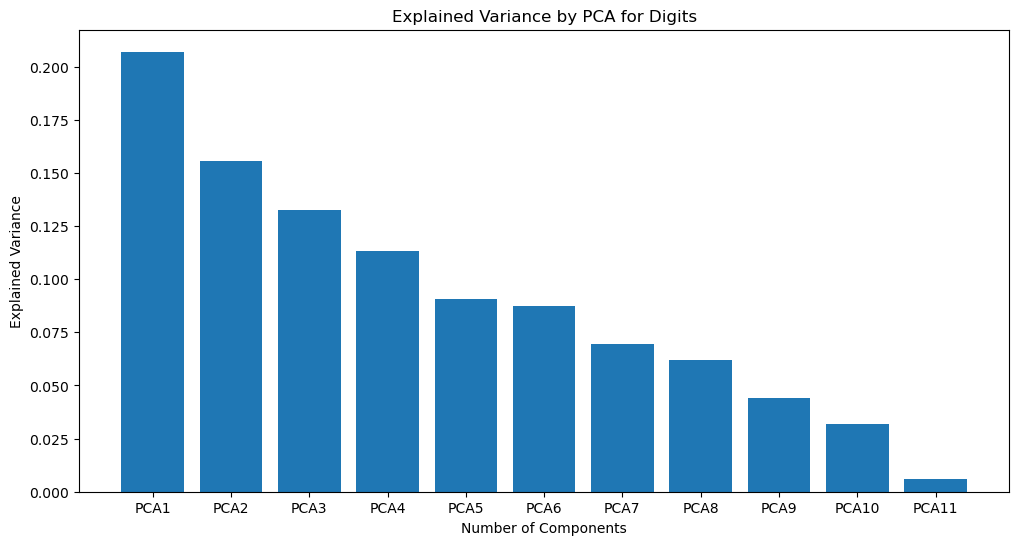

In [143]:
#Scree Plot
plt.figure(figsize=[12,6])
plt.bar(['PCA'+str(x) for x in range(1,12)], pca2.explained_variance_ratio_[:11])
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance');
plt.title('Explained Variance by PCA for Digits');

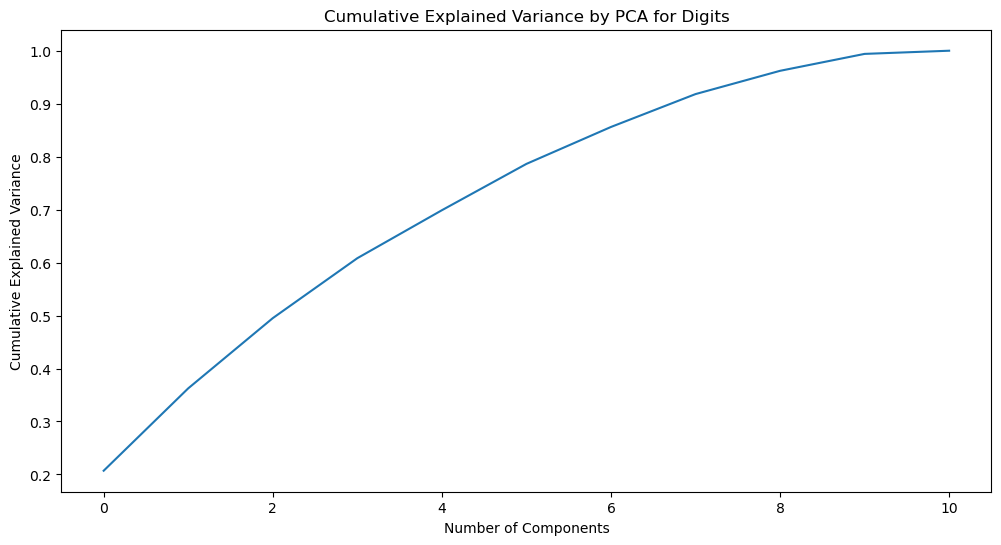

In [135]:
#9-10 components correspond approximately 90%, when we make 9 clusters, it can represent the  dataset.
plt.figure(figsize=[12,6])
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');
plt.title('Cumulative Explained Variance by PCA for Digits');